In [1]:
import pandas as pd
import numpy as np

In [2]:
!ls

CRISPRGeneEffect.csv                 cell-line-selector.csv
CRISPR_kidney_scores_wo_outliers.tsv label_c2.csv
Labels_from_clustering.csv           label_c3.csv
annotation.ipynb


In [3]:
df_cl = pd.read_csv("cell-line-selector.csv")
df_map = pd.read_csv("CRISPRGeneEffect.csv", index_col=0)

In [4]:
df_map = df_map.T
df_map.shape
df_map

,ACH-000004,ACH-000005,ACH-000007,ACH-000009,ACH-000011,ACH-000012,ACH-000013,ACH-000014,ACH-000015,ACH-000017,...,ACH-002283,ACH-002284,ACH-002285,ACH-002294,ACH-002295,ACH-002296,ACH-002297,ACH-002298,ACH-002304,ACH-002305
A1BG (1),0.014633,-0.261566,-0.028717,0.000225,0.095791,-0.108980,-0.077777,-0.053740,-0.189235,-0.009789,...,-0.109261,-0.092109,-0.156263,0.026595,-0.036315,-0.073879,0.084735,-0.172365,-0.033065,0.076307
A1CF (29974),-0.032777,0.174833,-0.117017,-0.283124,-0.099622,0.058620,-0.078709,-0.157498,-0.035974,-0.028755,...,0.069098,-0.024094,0.278745,-0.336219,-0.225388,0.046252,-0.249753,-0.112164,0.171028,-0.241877
A2M (2),-0.151299,0.106526,0.030971,0.051248,0.022204,0.172384,0.026442,0.038028,-0.081227,-0.003561,...,0.034826,0.052046,0.006431,0.002214,0.114886,-0.077086,0.045093,0.055771,-0.044622,0.165187
A2ML1 (144568),-0.071388,0.135635,0.083795,0.120321,0.199771,0.223336,0.100746,0.057477,0.040641,0.022338,...,0.203743,0.123172,0.104118,0.220993,0.164997,0.028623,0.070714,-0.017571,0.185127,-0.088436
A3GALT2 (127550),0.046511,-0.076753,0.032668,0.022834,-0.048126,0.119961,-0.069465,0.026942,0.073002,-0.271078,...,0.004774,-0.253843,-0.221195,-0.039764,-0.049454,-0.000662,-0.194074,-0.010154,0.063611,0.031024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A (440590),0.077283,-0.161894,-0.031683,-0.136990,0.086453,0.022825,-0.084500,-0.040380,-0.002087,0.000521,...,-0.093064,-0.128666,-0.055890,0.057139,-0.029959,-0.054452,0.029340,-0.006500,-0.079415,0.010098
ZYG11B (79699),-0.294451,-0.070230,-0.291406,-0.421927,-0.166360,-0.067238,-0.110156,-0.185443,-0.123983,-0.187397,...,-0.302555,-0.144733,-0.241294,-0.010174,-0.058430,-0.260831,-0.120501,-0.158971,-0.130105,-0.107611
ZYX (7791),0.143978,-0.006275,-0.065945,0.050002,-0.055975,-0.138806,0.002891,-0.253260,-0.090832,0.087124,...,-0.063947,0.027137,0.004876,0.132072,-0.013331,0.064285,-0.058169,-0.114161,0.133510,-0.108798
ZZEF1 (23140),0.197069,0.002458,-0.260946,-0.107675,-0.159886,-0.063841,-0.143869,0.212756,-0.182880,-0.231466,...,-0.140799,-0.183097,-0.149929,0.032018,-0.152010,0.041468,-0.179429,0.128512,-0.126235,0.001063


In [5]:
df_cl

,LongTable-checkbox,lineage1,lineage2,lineage3,depmapId,displayName
0,False,Soft Tissue,Synovial Sarcoma,Synovial Sarcoma,ACH-001270,127399
1,False,CNS/Brain,Diffuse Glioma,Astrocytoma,ACH-001000,1321N1
2,False,Bone,Osteosarcoma,Osteosarcoma,ACH-001001,143B
3,False,CNS/Brain,Diffuse Glioma,Glioblastoma,ACH-002680,170MGBA
4,False,Breast,Non-Cancerous,Immortalized Breast Cells,ACH-002319,184A1
...,...,...,...,...,...,...
1821,False,Lymphoid,T-Lymphoblastic Leukemia/Lymphoma,Natural Killer (NK) Cell Lymphoblastic Leukemi...,ACH-002317,YT
1822,False,Skin,Melanoma,Melanoma,ACH-002847,YUHOIN0650
1823,False,Breast,Invasive Breast Carcinoma,Breast Invasive Ductal Carcinoma,ACH-000097,ZR751
1824,False,Breast,Invasive Breast Carcinoma,Breast Invasive Lobular Carcinoma,ACH-000828,ZR7530


In [9]:
depmap_id = df_cl["depmapId"]
depmap_l1 = df_cl["lineage1"]
id_kidney = depmap_l1[depmap_l1 == "Kidney"].index
name_cl = depmap_id[id_kidney].to_list()
print(name_cl)
#Parse DepMap to select above cell lines 
id_true = []
count = 0
for k, var in enumerate(df_map.columns):
    if var in name_cl:
        id_true.append(k)
        count +=1
df_new = df_map.iloc[:, id_true]
df_new = df_new.add_prefix('kidney ')
df_new.shape


['ACH-000411', 'ACH-000649', 'ACH-000555', 'ACH-000429', 'ACH-000046', 'ACH-002090', 'ACH-000792', 'ACH-000433', 'ACH-000234', 'ACH-000457', 'ACH-001163', 'ACH-000096', 'ACH-000375', 'ACH-001310', 'ACH-002139', 'ACH-000049', 'ACH-001087', 'ACH-001532', 'ACH-000684', 'ACH-000709', 'ACH-000250', 'ACH-000313', 'ACH-001109', 'ACH-002150', 'ACH-002151', 'ACH-002155', 'ACH-002167', 'ACH-002168', 'ACH-000533', 'ACH-000159', 'ACH-000189', 'ACH-001175', 'ACH-002187', 'ACH-002188', 'ACH-002189', 'ACH-002190', 'ACH-002191', 'ACH-002192', 'ACH-002195', 'ACH-000385', 'ACH-001194', 'ACH-000016', 'ACH-000246', 'ACH-000272', 'ACH-000300', 'ACH-000600', 'ACH-002199', 'ACH-000513', 'ACH-000907', 'ACH-001200', 'ACH-001398', 'ACH-001208', 'ACH-001210', 'ACH-000459', 'ACH-000317', 'ACH-000495', 'ACH-001224', 'ACH-001687', 'ACH-001225', 'ACH-001688', 'ACH-000428', 'ACH-000262', 'ACH-000484', 'ACH-000171']


(17453, 32)

In [6]:
name_cl

['ACH-000411',
 'ACH-000649',
 'ACH-000555',
 'ACH-000429',
 'ACH-000046',
 'ACH-002090',
 'ACH-000792',
 'ACH-000433',
 'ACH-000234',
 'ACH-000457',
 'ACH-001163',
 'ACH-000096',
 'ACH-000375',
 'ACH-001310',
 'ACH-002139',
 'ACH-000049',
 'ACH-001087',
 'ACH-001532',
 'ACH-000684',
 'ACH-000709',
 'ACH-000250',
 'ACH-000313',
 'ACH-001109',
 'ACH-002150',
 'ACH-002151',
 'ACH-002155',
 'ACH-002167',
 'ACH-002168',
 'ACH-000533',
 'ACH-000159',
 'ACH-000189',
 'ACH-001175',
 'ACH-002187',
 'ACH-002188',
 'ACH-002189',
 'ACH-002190',
 'ACH-002191',
 'ACH-002192',
 'ACH-002195',
 'ACH-000385',
 'ACH-001194',
 'ACH-000016',
 'ACH-000246',
 'ACH-000272',
 'ACH-000300',
 'ACH-000600',
 'ACH-002199',
 'ACH-000513',
 'ACH-000907',
 'ACH-001200',
 'ACH-001398',
 'ACH-001208',
 'ACH-001210',
 'ACH-000459',
 'ACH-000317',
 'ACH-000495',
 'ACH-001224',
 'ACH-001687',
 'ACH-001225',
 'ACH-001688',
 'ACH-000428',
 'ACH-000262',
 'ACH-000484',
 'ACH-000171']

In [7]:
from sklearn.impute import KNNImputer


In [44]:
df = pd.read_csv("CRISPR_kidney_scores_wo_outliers.tsv", sep="\t")

In [10]:
knn_imputer = KNNImputer(missing_values=np.nan, n_neighbors=5, weights='uniform', metric='nan_euclidean')
df_knn = df_new.copy()
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)
columns_Nans = df_knn.columns[df_knn.isna().any()].to_list()
print(len(columns_Nans))

0


In [13]:
from sklearn.cluster import KMeans
def range1( start, end):
    return range(start, end+1)

model = [ KMeans(k, n_init=10).fit(df_knn_imputed) for k in range1(2, 2) ]
labels = model[0].labels_


In [23]:
from sklearn.decomposition import PCA

X = df_new.to_numpy()
pca = PCA(n_components=0.90)
pca.fit(X)
X_pca = pca.fit_transform(X)
X_proj = pca.inverse_transform(X_pca)
print(pca.explained_variance_ratio_)
print(X_pca.shape, X_proj.shape)

[0.85880778 0.01754742 0.00870553 0.00716775 0.00704883 0.00610978]
(17453, 6) (17453, 32)


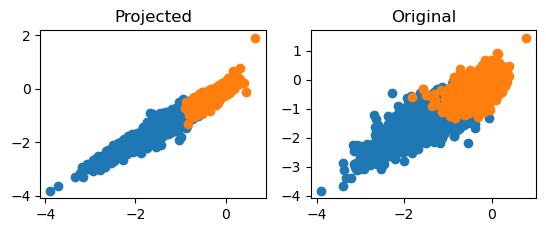

In [30]:
import matplotlib.pyplot as plt
count, unique = np.unique(labels, return_counts=True)

plt.subplot(2,2,1)
for i,k in zip(count, unique):
    plt.scatter(X_proj[labels == i, 0], X_proj[labels==i, 1])
    plt.title("Projected")

plt.subplot(2,2,2)
for i,k in zip(count, unique):
    plt.scatter(X[labels == i, 0], X[labels==i, 1])
    plt.title("Original")

In [31]:
df_new

,kidney ACH-000159,kidney ACH-000189,kidney ACH-000234,kidney ACH-000246,kidney ACH-000250,kidney ACH-000262,kidney ACH-000272,kidney ACH-000313,kidney ACH-000317,kidney ACH-000375,...,kidney ACH-000907,kidney ACH-001163,kidney ACH-001194,kidney ACH-001310,kidney ACH-001398,kidney ACH-001532,kidney ACH-001687,kidney ACH-001688,kidney ACH-002150,kidney ACH-002189
A1BG (1),-0.098583,0.025497,0.039759,-0.085034,-0.060763,-0.327514,0.023482,-0.047076,0.072916,-0.313158,...,-0.014384,-0.043480,0.170909,-0.133501,0.016807,-0.021419,-0.126049,-0.015302,-0.071998,0.006178
A1CF (29974),-0.194067,0.190203,0.003615,-0.016881,-0.025410,0.148797,-0.078053,-0.111188,-0.329842,-0.276735,...,-0.081780,-0.085841,-0.097003,0.016634,0.135088,-0.012608,-0.170539,0.115991,0.163529,-0.200031
A2M (2),0.056482,-0.064422,-0.060224,-0.007607,0.038200,0.068109,-0.014195,0.025927,0.027071,-0.172022,...,-0.036533,-0.079882,-0.013476,-0.010148,-0.183250,0.041469,0.137907,-0.229729,-0.098859,-0.038372
A2ML1 (144568),-0.043275,0.214010,0.081227,-0.007732,0.095462,0.034221,0.038967,0.075762,-0.098717,-0.102884,...,0.120296,0.128083,0.167051,0.048080,0.079721,0.085239,0.245497,0.106801,0.096733,0.109694
A3GALT2 (127550),0.042775,0.234450,-0.019064,0.047906,-0.096162,-0.055449,-0.204893,-0.164694,-0.188205,0.132969,...,-0.095750,-0.052707,-0.483428,-0.212870,-0.319487,-0.063677,-0.084950,-0.196248,-0.049440,-0.287985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A (440590),-0.214984,-0.122164,0.061923,0.043799,-0.021958,-0.008360,-0.031557,-0.093109,-0.134824,0.054312,...,-0.243649,-0.022502,-0.030715,-0.190116,0.126185,0.047339,-0.104483,-0.031745,0.062013,-0.098642
ZYG11B (79699),-0.222925,-0.429341,-0.168435,-0.200763,-0.124535,-0.254806,-0.211923,-0.242198,-0.083352,-0.181971,...,-0.112868,0.085608,-0.083577,-0.265525,-0.398217,-0.184396,-0.371834,-0.216044,-0.141312,-0.148466
ZYX (7791),0.015540,-0.092973,0.032190,-0.330597,-0.081643,-0.224664,-0.050358,-0.028192,-0.123594,-0.496452,...,-0.293738,-0.172174,-0.061577,-0.118704,-0.119744,-0.241001,-0.104015,-0.012809,-0.058903,0.023899
ZZEF1 (23140),-0.105381,0.038808,-0.224601,-0.041535,-0.042718,-0.081895,-0.096986,-0.161992,0.188246,0.016271,...,0.016769,-0.259722,-0.129833,-0.392298,0.056096,-0.154736,-0.224777,-0.113155,-0.046388,-0.207682
